<a href="https://colab.research.google.com/github/hell0fr1end/DerinOgrenmeileHastalikTahmini/blob/main/PROJE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_excel('/content/drive/My Drive/data/corona_data.xlsx')

dataset.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1,0,0,0,0,0.0,1,0,1
1,1,0,0,0,0,1.0,0,1,1
2,0,0,0,0,0,0.0,0,1,1
3,0,1,0,0,0,0.0,0,1,2
4,1,0,0,0,0,0.0,1,1,1


In [4]:
dataset.dropna(how="any",inplace=True)

In [5]:
dataset

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1,0,0,0,0,0.0,1,0,1
1,1,0,0,0,0,1.0,0,1,1
2,0,0,0,0,0,0.0,0,1,1
3,0,1,0,0,0,0.0,0,1,2
4,1,0,0,0,0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...
138167,1,1,0,0,0,0.0,1,1,2
138168,1,1,1,0,1,0.0,0,1,2
138169,1,0,0,0,0,0.0,0,1,2
138170,1,0,0,0,0,0.0,0,0,1


In [6]:
dataset.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [7]:
train_X = dataset.drop(columns=['corona_result'])
train_X.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,1,2
4,1,0,0,0,0,1,1,1


In [8]:
train_y = dataset[['corona_result']]
train_y.head()

,corona_result
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=100)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False )

In [10]:
import numpy as np

y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
n_cols = train_X.shape[1]
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(n_cols,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [12]:
history =model.fit(X_train, 
                y_train,
                validation_data=(x_val, y_val),
                batch_size=32, 
                shuffle=True,
                verbose=1,
                epochs=10)

Epoch 1/10
2556/2556 [==============================] - 16s 6ms/step - loss: 0.0508 - accuracy: 0.9362 - val_loss: 0.0426 - val_accuracy: 0.9477
Epoch 2/10
2556/2556 [==============================] - 14s 5ms/step - loss: 0.0403 - accuracy: 0.9531 - val_loss: 0.0398 - val_accuracy: 0.9533
Epoch 3/10
2556/2556 [==============================] - 14s 5ms/step - loss: 0.0385 - accuracy: 0.9548 - val_loss: 0.0387 - val_accuracy: 0.9537
Epoch 4/10
2556/2556 [==============================] - 15s 6ms/step - loss: 0.0374 - accuracy: 0.9552 - val_loss: 0.0376 - val_accuracy: 0.9541
Epoch 5/10
2556/2556 [==============================] - 14s 5ms/step - loss: 0.0367 - accuracy: 0.9559 - val_loss: 0.0369 - val_accuracy: 0.9551
Epoch 6/10
2556/2556 [==============================] - 15s 6ms/step - loss: 0.0364 - accuracy: 0.9563 - val_loss: 0.0368 - val_accuracy: 0.9549
Epoch 7/10
2556/2556 [==============================] - 15s 6ms/step - loss: 0.0362 - accuracy: 0.9561 - val_loss: 0.0366 - val_ac

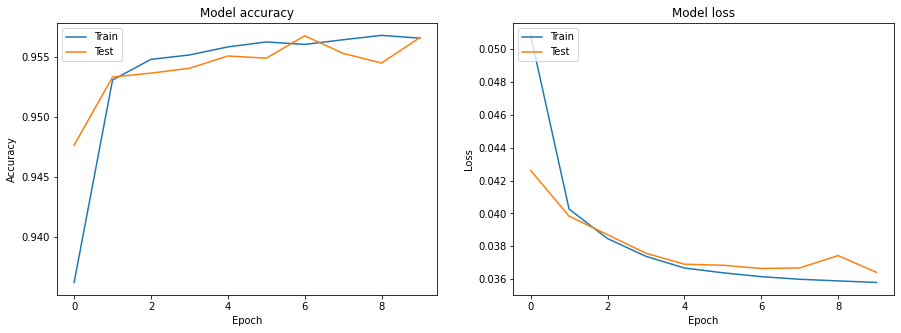

In [13]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
results = model.predict(X_test.iloc[0:1])
class_names = ['Negatif', 'Pozitif']
print("Tahmin Sonucu: %",(results[0][0]*100).astype(np.int32)," İhtimalle Covid");
print("Gerçek sonuç:",class_names[y_test['corona_result'].values[0]])

Tahmin Sonucu: % 2  İhtimalle Covid
Gerçek sonuç: Negatif
